#  Lead Scoring Case Study Assignment

__Problem Statement :__
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around N
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hoton.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

__Our Goals of the Case Study:__

- To **generate a lead score using the lead data for a potential data point to target potential leads to convert into learner** 

__The steps are broadly:__
1. Understand the data
2. Data Cleaning 
3. Data Preprocessing/Feature Engineering
4. Build your Model
5. Evaluate your model
6. Predict on leads.

# Import modules

In [1]:
import numpy as np
import pandas as pd

C:\Users\ashar534\AppData\Local\Temp\ipykernel_26536\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Understand the data

In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspect the shape of the dataset

lead.shape

(9240, 37)

In [4]:
# Inspect the different columsn in the dataset

lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are many categorical variables in the data set. Let analyze the variables separately to address the various aspects of certain features.

## Data Cleaning and Preparation

In [7]:
# Check the number of missing values in each column

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

its evident that we have some features that have many null values, its wise to drop these columns since they are not useful. Keeping in mind the total number of rows being 9000 lets set a threshold of 3500 null values or more to be dropped.

In [8]:
# Drop columns with 3500 or more missing values.

for col in lead.columns:
    if lead[col].isnull().sum() > 3500:
        lead.drop(col, axis = 1, inplace=True)

In [9]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Since we are serving online courses, it would not make sense to have city and country to be involved in our modeling.

In [10]:
lead.drop(['City'], axis = 1, inplace = True)

In [11]:
lead.drop(['Country'], axis = 1, inplace = True)

In [12]:
round(lead.isnull().sum()/len(lead.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [13]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

Now lets check each category and their respective values per category.

In [14]:
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Some of the features include some columns that have only once category and some with multiple category but negligible value count per category These features invlove `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`,`What matters most to you in choosing a course` . Lets drop them as well

In [15]:
lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content','What matters most to you in choosing a course' ,
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

We also saw in the initial data analysis that we have some categorical variables where we have select as a data entry for leads. This is likely an interface issue where people didnt select anything and it got left as it was in the UI. For the columns that are left we have two columns with select value namely `Lead Profile`,`Specialization`.

In [16]:
lead['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [17]:
lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

The feature `Lead Profile` has significant amount of Select entry which is as good as null values hence we can drop this column.

In [18]:
lead.drop(['Lead Profile'], axis = 1, inplace = True)

In [19]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Lets drop the Tags column as well since we can see a good number of null values as compared to other left features.

In [20]:
lead.drop(['Tags'], axis = 1, inplace = True)

In [21]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

For the column `What is your current occupation` we have a significant amount of null values and the categories segregation is not so much uniform. So might have to drop the rows with null values since if we go for mode to replace null values it would make it more unbalanced.

In [22]:
lead = lead[~lead['What is your current occupation'].isnull() == True]

We can see that dropping the leads with null values in `What is your current occupation` resulted in reduction of null value count in other features as well which indicates those leads where not that significant.

In [23]:
nullCounts = lead.isnull().sum()
nullCounts[nullCounts > 0].index.tolist() 

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education']

In [24]:
cols = nullCounts[nullCounts > 0].index.tolist() 
for col in cols:
    lead[col].fillna(lead[col].mode().iloc[0], inplace = True)

C:\Users\ashar534\AppData\Local\Temp\ipykernel_26536\3024653070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lead[col].fillna(lead[col].mode().iloc[0], inplace = True)


Since now the number of null values present in the columns are quite small we can simply replace them with the mode of that feature.

In [25]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now our data doesn't have any null values.

In [26]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [27]:
lead.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [28]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,Modified


# Data Modelling

## Univariate Analysis
 - Categorical Variables

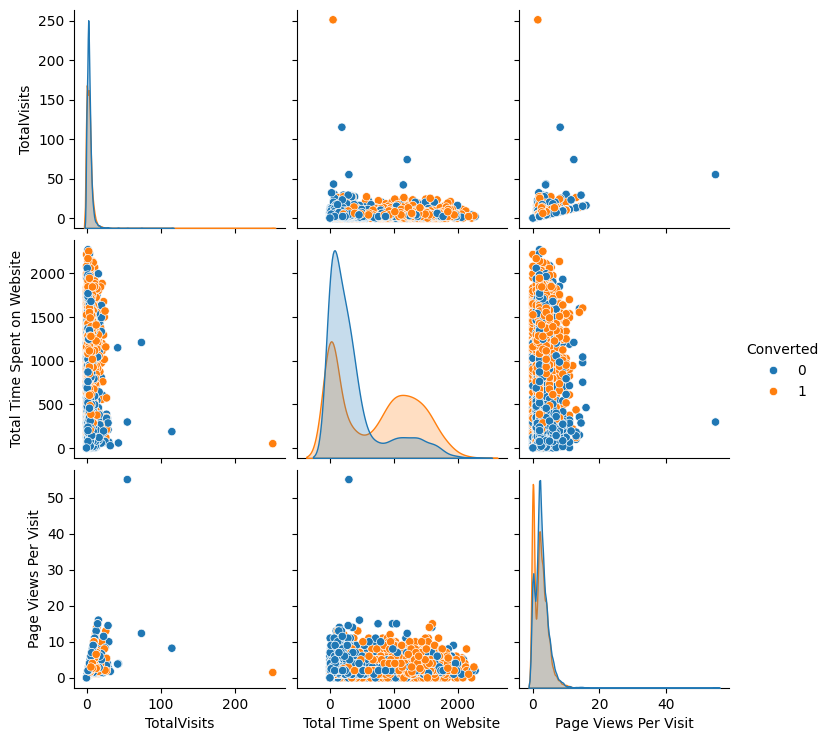

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

In [30]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit' ]
lead[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.0
1,5.0,674,2.5
2,2.0,1532,2.0
3,1.0,305,1.0
4,2.0,1428,1.0


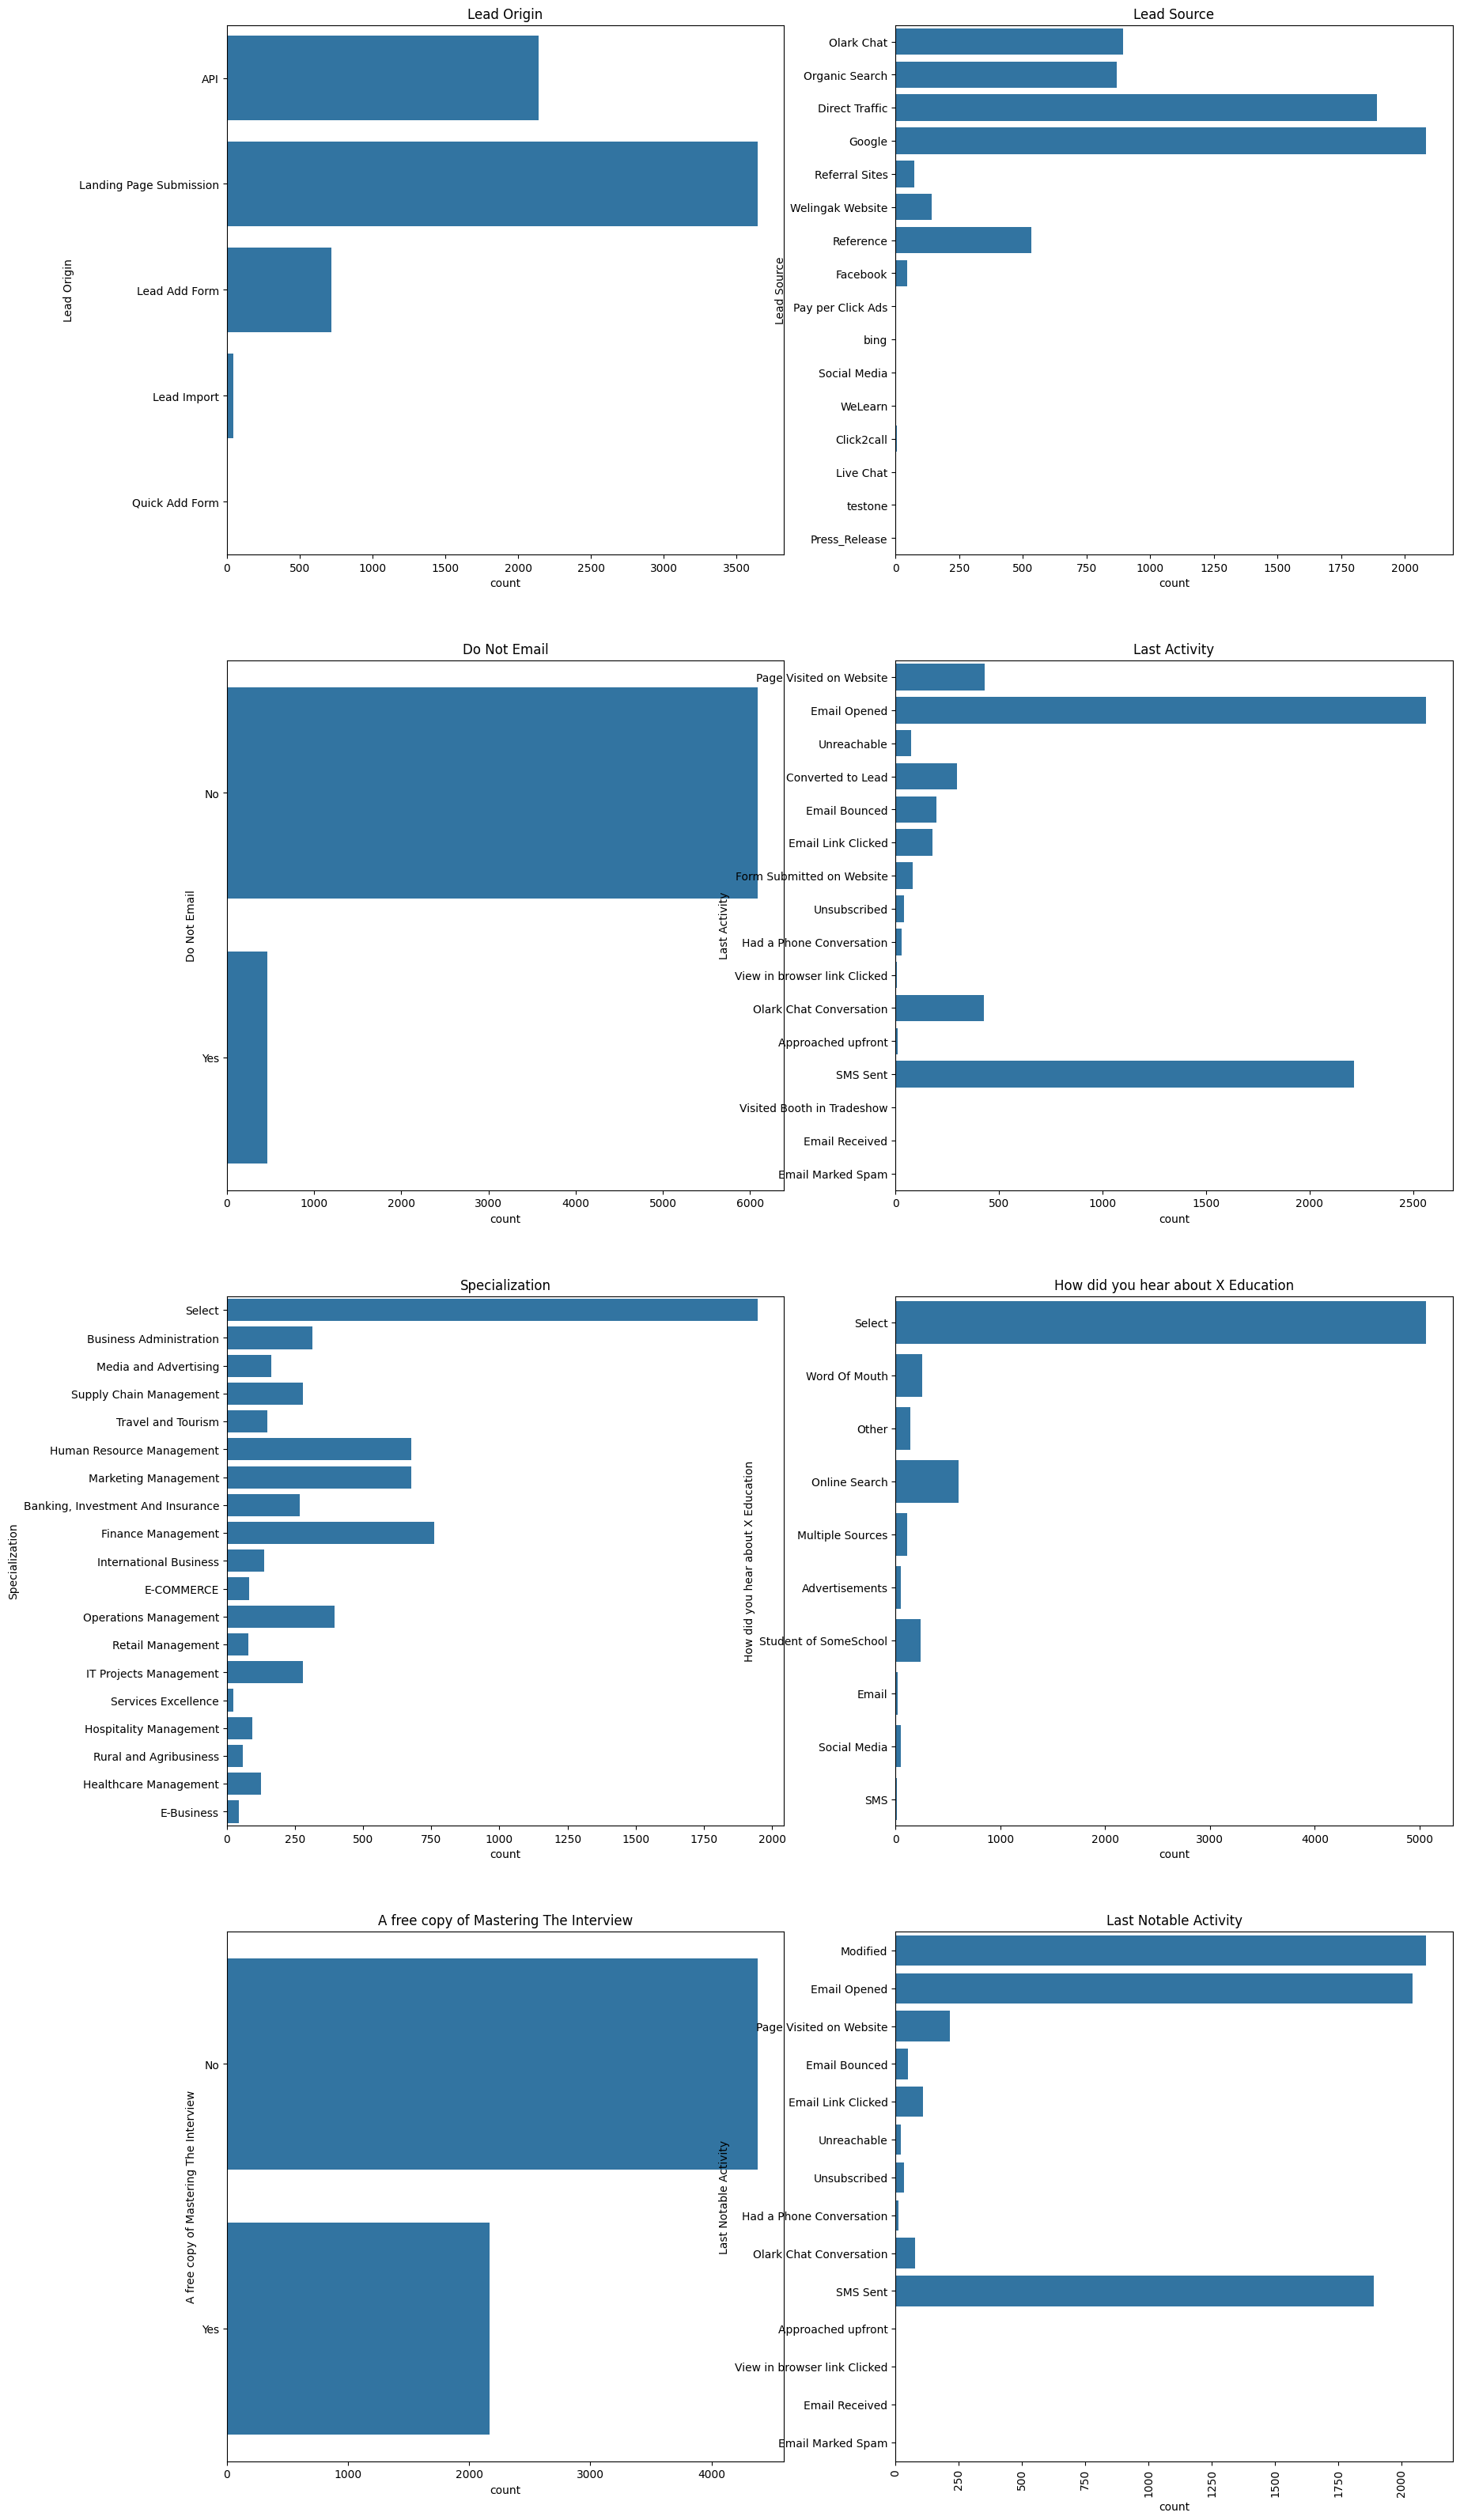

In [32]:
plt.figure(figsize = (20,40))

plt.subplot(4,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(lead['Lead Source'])
plt.title('Lead Source')

plt.subplot(4,2,3)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,2,4)
sns.countplot(lead['Last Activity'])
plt.title('Last Activity')

plt.subplot(4,2,5)
sns.countplot(lead['Specialization'])
plt.title('Specialization')

plt.subplot(4,2,6)
sns.countplot(lead['How did you hear about X Education'])
plt.title('How did you hear about X Education')

# plt.subplot(6,2,1)
# sns.countplot(lead['What is your current occupation'])
# plt.title('What is your current occupation')

plt.subplot(4,2,7)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,8)
sns.countplot(lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

### We can infer many things from the counts plot above : 
 - Majority of the customers who got identified from the leads came from landing page submission mode.
 - Majority of the leads came from source Google.
 - Almost everyone opted for No Email subscription
 - Majority of the students are unsure of the specialization they want to pursue. Finance Management tops next.

Lets now check the significance or relation between these and our target variable `Converted`.

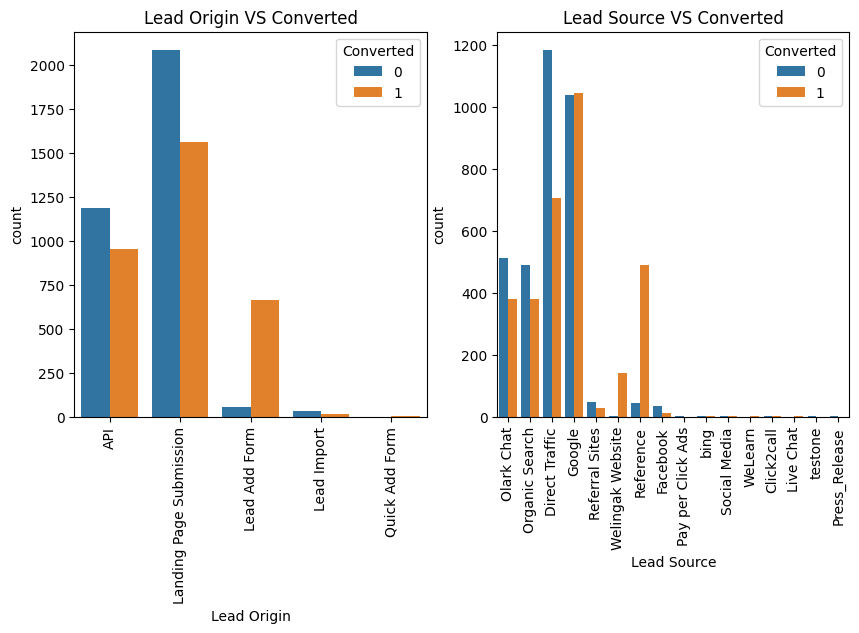

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin VS Converted')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source VS Converted')
plt.show()

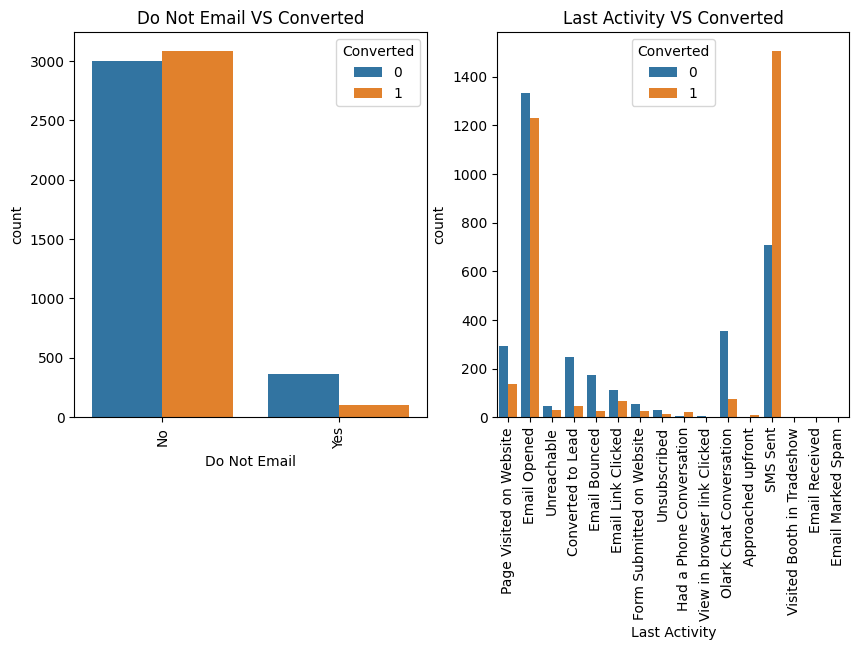

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email VS Converted')

plt.subplot(1,2,2)
sns.countplot(x='Last Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity VS Converted')
plt.show()

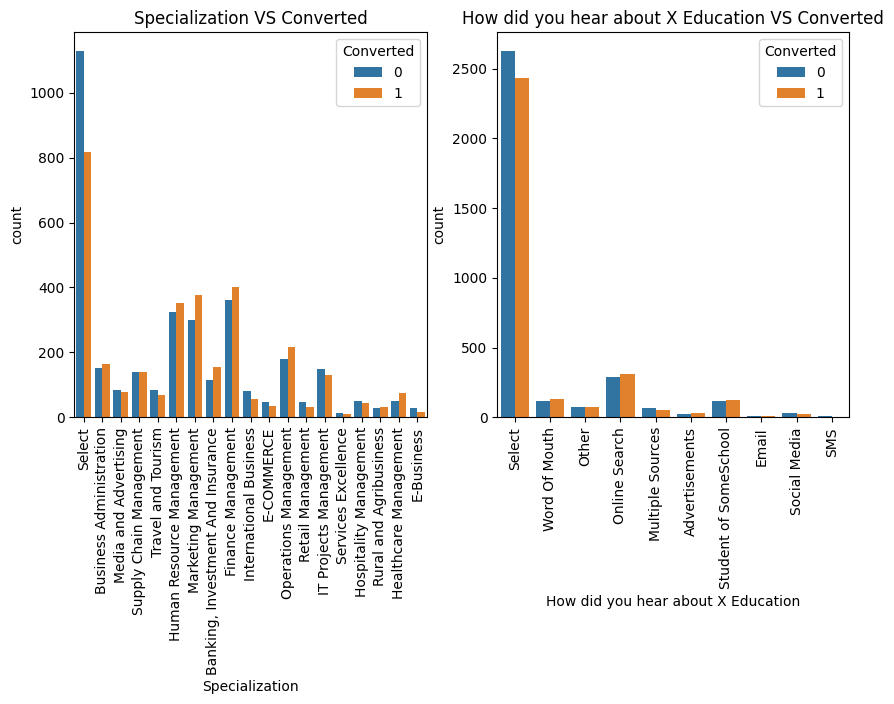

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization VS Converted')

plt.subplot(1,2,2)
sns.countplot(x='How did you hear about X Education', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('How did you hear about X Education VS Converted')
plt.show()

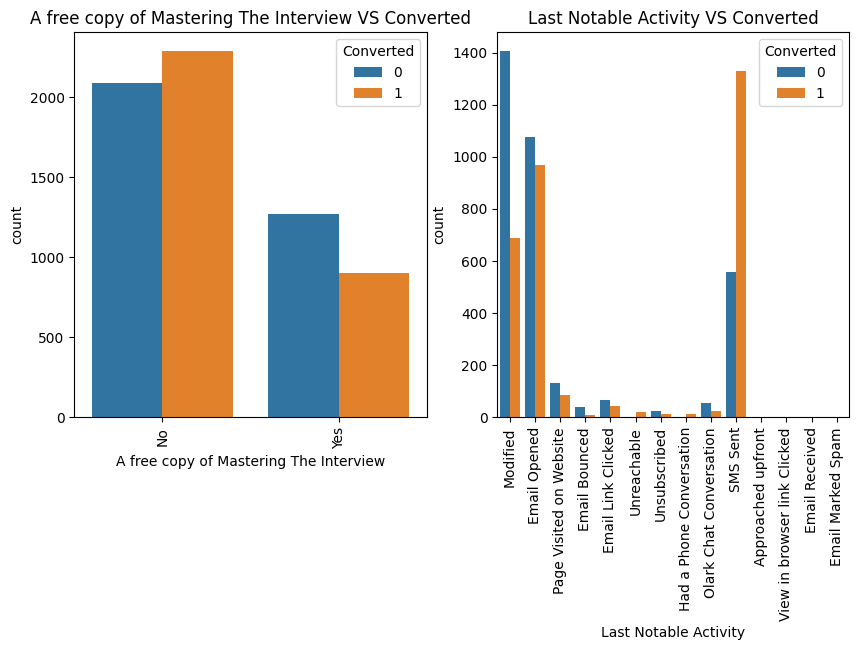

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview VS Converted')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity VS Converted')
plt.show()

In [37]:
cols.append('Converted')

<Axes: >

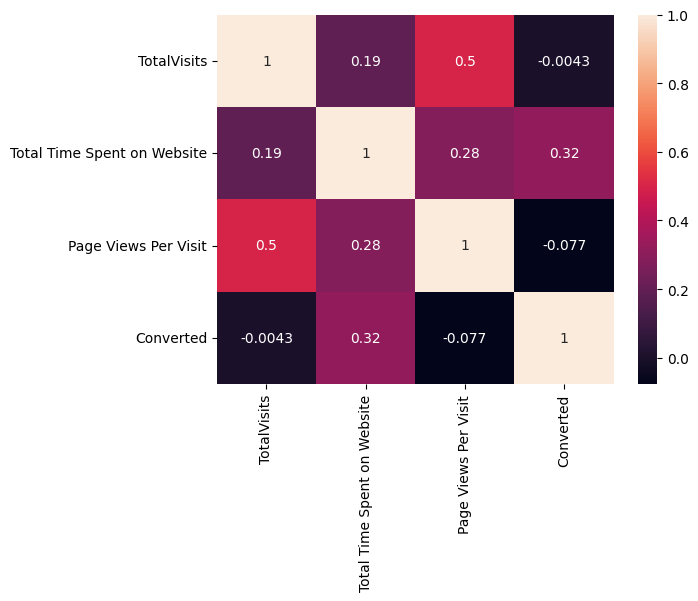

In [38]:
sns.heatmap(lead[cols].corr(), annot=True)

We can clearly see some coversion based on time spent on the website.

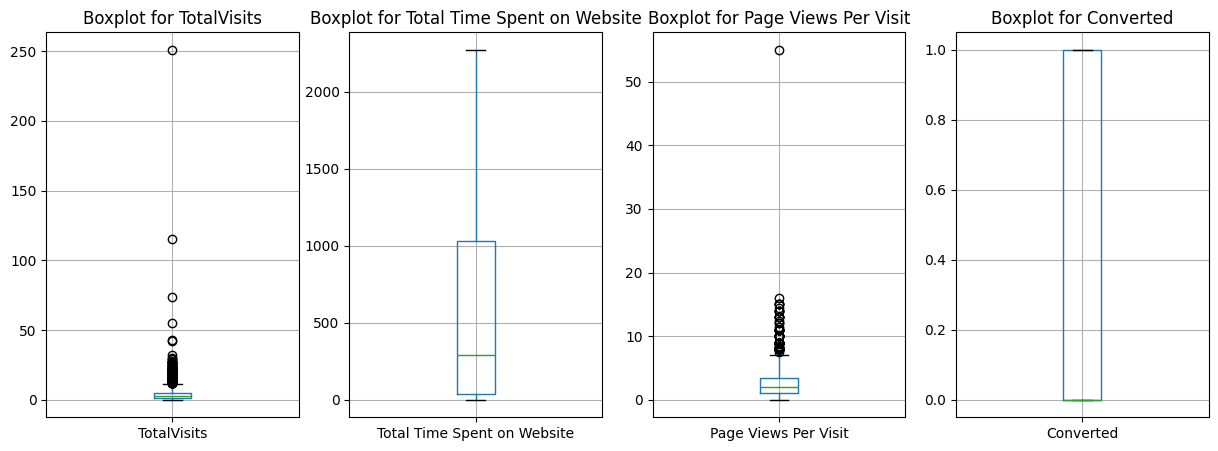

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    lead.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")

### Dummy variable Analysis

 - Now lets take care of all the categorical columns

In [40]:
catcol = lead.loc[:, lead.dtypes == 'object']
catcol.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
dumVar = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

lead = pd.concat([lead, dumVar], axis=1)

In [42]:
dumVar.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [43]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activ

In [44]:
# lets drop all columns which has select as a category since this is not a valid option
lead = lead.drop(['Specialization_Select','How did you hear about X Education_Select'], axis = 1)

In [45]:
# Lets Drop the features for which the dummy variables were created

lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)

In [46]:
# Let's take a look at the dataset again

lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [47]:
for col in lead.columns:
    lead[col] = lead[col].astype(int)


In [48]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5,674,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2,1532,2,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,305,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,1428,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Test-Train Split for data modeling to predict Lead conversion



In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Xlead = lead.drop(['Converted'],axis=1,inplace = False)
Ylead = lead['Converted']

In [51]:
# Split the dataset into 65% train and 35% test

X_train, X_test, y_train, y_test = train_test_split(Xlead, Ylead, train_size=0.65, test_size=0.35, random_state=150)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [52]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [53]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3988,0.054545,0.090669,0.018182,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5449,0.054545,0.432658,0.054545,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8261,0.054545,0.485035,0.054545,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9121,0.054545,0.138204,0.054545,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6965,0.309091,0.147887,0.090909,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

Now, let’s shift our focus to model building. As you’ve observed, the dataset contains numerous variables, making it challenging to handle them all. To address this, we’ll adopt a strategy of selecting a smaller subset of features from this extensive pool using Recursive Feature Elimination (RFE). RFE helps us identify the most relevant features for our modeling task

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
X_train.shape

(4257, 82)

In [56]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)  
rfe = rfe.fit(X_train, y_train)

In [57]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 62),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 59),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced

In [58]:
col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [59]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [60]:
import statsmodels.api as sm

In [61]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4257
Model:                            GLM   Df Residuals:                     4236
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1868.3
Date:                Sat, 23 Mar 2024   Deviance:                       3736.6
Time:                        12:17:18   Pearson chi2:                 4.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7326      0.592     -2.929      0.003      -2.892      -0.573
TotalVisits                                              3.8058      0.767      4.965      0.000       2.303       5.308
Total Time Spent on Website                              4.7709      0.200     23.817      0.000       4.378       5.164
Page Views Per Visit                                    -5.1524      1.489     -3.461      0.001      -8.070      -2.235
Lead Origin_Lead Add Form                                3.8077      0.236     16.120      0.000       3.345       4.271
Lead Source_Olark Chat                                   1.4956      0.147     10.172      0.000       1.207       1.784
Lead Source_Welingak Website                             1.7661      0.750      2.354      0.019       0.295       3.237
Do Not Email_Yes                                        -1.5029      0.194     -7.752      0.000      -1.883      -1.123
Last Activity_Converted to Lead                         -0.7521      0.274     -2.748      0.006      -1.288      -0.216
Last Activity_Olark Chat Conversation                   -0.6092      0.195     -3.130      0.002      -0.991      -0.228
Last Activity_SMS Sent                                   1.0774      0.090     12.036      0.000       0.902       1.253
Last Activity_Unreachable                               -1.4025      0.764     -1.836      0.066      -2.900       0.095
Specialization_Hospitality Management                   -0.7457      0.359     -2.078      0.038      -1.449      -0.042
How did you hear about X Education_Email                 0.9467      0.608      1.558      0.119      -0.244       2.137
What is your current occupation_Housewife               22.4139   1.89e+04      0.001      0.999    -3.7e+04     3.7e+04
What is your current occupation_Student                 -0.2409      0.619     -0.389      0.697      -1.455       0.973
What is your current occupation_Unemployed              -0.2351      0.578     -0.407      0.684      -1.368       0.898
What is your current occupation_Working Professional     2.2731      0.609      3.735      0.000       1.080       3.466
Last Notable Activity_Had a Phone Conversation          22.6281   1.42e+04      0.002      0.999   -2.77e+04    2.78e+04
Last Notable Activity_Modified                          -0.6861      0.103     -6.661      0.000      -0.888      -0.484
Last Notable Activity_Unreachable                        3.5871      1.112      3.226      0.001       1.408       5.767
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [62]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,6.54
2,Page Views Per Visit,4.19
0,TotalVisits,3.30
1,Total Time Spent on Website,2.34
18,Last Notable Activity_Modified,1.97
16,What is your current occupation_Working Profes...,1.88
3,Lead Origin_Lead Add Form,1.87
4,Lead Source_Olark Chat,1.81
9,Last Activity_SMS Sent,1.74
10,Last Activity_Unreachable,1.48


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `What is your current occupation_Unemployed` since it has a high p-value as well as a high VIF.

In [64]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [65]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4257
Model:                            GLM   Df Residuals:                     4237
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1868.4
Date:                Sat, 23 Mar 2024   Deviance:                       3736.7
Time:                        12:17:19   Pearson chi2:                 4.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9682      0.121    -16.251      0.000      -2.206      -1.731
TotalVisits                                              3.8294      0.765      5.007      0.000       2.331       5.328
Total Time Spent on Website                              4.7732      0.200     23.833      0.000       4.381       5.166
Page Views Per Visit                                    -5.1610      1.489     -3.467      0.001      -8.078      -2.244
Lead Origin_Lead Add Form                                3.8098      0.236     16.132      0.000       3.347       4.273
Lead Source_Olark Chat                                   1.4960      0.147     10.176      0.000       1.208       1.784
Lead Source_Welingak Website                             1.7644      0.750      2.351      0.019       0.294       3.235
Do Not Email_Yes                                        -1.5026      0.194     -7.751      0.000      -1.883      -1.123
Last Activity_Converted to Lead                         -0.7540      0.274     -2.756      0.006      -1.290      -0.218
Last Activity_Olark Chat Conversation                   -0.6093      0.195     -3.131      0.002      -0.991      -0.228
Last Activity_SMS Sent                                   1.0762      0.089     12.030      0.000       0.901       1.252
Last Activity_Unreachable                               -1.4053      0.764     -1.840      0.066      -2.903       0.092
Specialization_Hospitality Management                   -0.7474      0.359     -2.083      0.037      -1.451      -0.044
How did you hear about X Education_Email                 0.9456      0.608      1.556      0.120      -0.245       2.137
What is your current occupation_Housewife               22.6466   1.89e+04      0.001      0.999    -3.7e+04     3.7e+04
What is your current occupation_Student                 -0.0070      0.230     -0.031      0.976      -0.458       0.444
What is your current occupation_Working Professional     2.5070      0.199     12.580      0.000       2.116       2.898
Last Notable Activity_Had a Phone Conversation          22.6264   1.42e+04      0.002      0.999   -2.77e+04    2.78e+04
Last Notable Activity_Modified                          -0.6848      0.103     -6.652      0.000      -0.887      -0.483
Last Notable Activity_Unreachable                        3.5921      1.112      3.232      0.001       1.413       5.771
========================================================================================================================
"""

The variable , `What is your current occupation_Housewife`,`What is your current occupation_Student`,`Last Notable Activity_Had a Phone Conversation` also needs to be dropped.

In [66]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.56
0,TotalVisits,3.11
1,Total Time Spent on Website,1.96
17,Last Notable Activity_Modified,1.83
9,Last Activity_SMS Sent,1.57
3,Lead Origin_Lead Add Form,1.52
10,Last Activity_Unreachable,1.48
18,Last Notable Activity_Unreachable,1.44
8,Last Activity_Olark Chat Conversation,1.35
5,Lead Source_Welingak Website,1.27


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `What is your current occupation_Housewife`,`What is your current occupation_Student`,`Last Notable Activity_Had a Phone Conversation`.

In [69]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife','What is your current occupation_Student'], axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4257
Model:                            GLM   Df Residuals:                     4240
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1877.4
Date:                Sat, 23 Mar 2024   Deviance:                       3754.9
Time:                        12:19:12   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3955
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9523      0.120    -16.227      0.000      -2.188      -1.716
TotalVisits                                              3.8760      0.761      5.093      0.000       2.385       5.368
Total Time Spent on Website                              4.7674      0.200     23.853      0.000       4.376       5.159
Page Views Per Visit                                    -5.1827      1.485     -3.490      0.000      -8.093      -2.272
Lead Origin_Lead Add Form                                3.8135      0.236     16.174      0.000       3.351       4.276
Lead Source_Olark Chat                                   1.4860      0.147     10.128      0.000       1.198       1.774
Lead Source_Welingak Website                             1.7525      0.750      2.336      0.020       0.282       3.223
Do Not Email_Yes                                        -1.5125      0.194     -7.807      0.000      -1.892      -1.133
Last Activity_Converted to Lead                         -0.7729      0.273     -2.827      0.005      -1.309      -0.237
Last Activity_Olark Chat Conversation                   -0.6239      0.194     -3.210      0.001      -1.005      -0.243
Last Activity_SMS Sent                                   1.0612      0.089     11.911      0.000       0.887       1.236
Last Activity_Unreachable                               -1.4247      0.764     -1.866      0.062      -2.921       0.072
Specialization_Hospitality Management                   -0.7591      0.359     -2.116      0.034      -1.462      -0.056
How did you hear about X Education_Email                 0.9316      0.608      1.533      0.125      -0.259       2.122
What is your current occupation_Working Professional     2.5023      0.199     12.582      0.000       2.112       2.892
Last Notable Activity_Modified                          -0.6802      0.103     -6.630      0.000      -0.881      -0.479
Last Notable Activity_Unreachable                        3.5938      1.111      3.234      0.001       1.416       5.772
========================================================================================================================
"""

Drop `How did you hear about X Education_Email`.

In [71]:
X_train.drop('How did you hear about X Education_Email', axis = 1, inplace = True)

In [72]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4257
Model:                            GLM   Df Residuals:                     4241
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1878.6
Date:                Sat, 23 Mar 2024   Deviance:                       3757.1
Time:                        12:20:04   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9417      0.120    -16.188      0.000      -2.177      -1.707
TotalVisits                                              3.8636      0.761      5.080      0.000       2.373       5.354
Total Time Spent on Website                              4.7559      0.200     23.836      0.000       4.365       5.147
Page Views Per Visit                                    -5.1584      1.483     -3.477      0.001      -8.066      -2.251
Lead Origin_Lead Add Form                                3.8060      0.236     16.152      0.000       3.344       4.268
Lead Source_Olark Chat                                   1.4783      0.147     10.090      0.000       1.191       1.766
Lead Source_Welingak Website                             1.7530      0.750      2.337      0.019       0.283       3.224
Do Not Email_Yes                                        -1.5153      0.194     -7.827      0.000      -1.895      -1.136
Last Activity_Converted to Lead                         -0.7709      0.273     -2.819      0.005      -1.307      -0.235
Last Activity_Olark Chat Conversation                   -0.6262      0.194     -3.223      0.001      -1.007      -0.245
Last Activity_SMS Sent                                   1.0569      0.089     11.873      0.000       0.882       1.231
Last Activity_Unreachable                               -1.4286      0.763     -1.871      0.061      -2.925       0.068
Specialization_Hospitality Management                   -0.7577      0.359     -2.109      0.035      -1.462      -0.054
What is your current occupation_Working Professional     2.5008      0.199     12.583      0.000       2.111       2.890
Last Notable Activity_Modified                          -0.6828      0.103     -6.659      0.000      -0.884      -0.482
Last Notable Activity_Unreachable                        3.5896      1.111      3.230      0.001       1.412       5.767
========================================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [73]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.55
0,TotalVisits,3.11
1,Total Time Spent on Website,1.95
13,Last Notable Activity_Modified,1.83
9,Last Activity_SMS Sent,1.56
3,Lead Origin_Lead Add Form,1.51
10,Last Activity_Unreachable,1.48
14,Last Notable Activity_Unreachable,1.44
8,Last Activity_Olark Chat Conversation,1.34
5,Lead Source_Welingak Website,1.27


## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [74]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Hospitality Management,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3988,0.054545,0.090669,0.018182,0,0,0,0,1,0,0,0,0,0,1,0
5449,0.054545,0.432658,0.054545,0,0,0,0,0,0,0,0,0,0,0,0
8261,0.054545,0.485035,0.054545,0,0,0,0,0,0,0,0,0,1,0,0
9121,0.054545,0.138204,0.054545,0,0,0,0,0,0,1,0,0,0,0,0
6965,0.309091,0.147887,0.090909,0,0,0,0,0,1,0,0,0,0,1,0


In [75]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3988    0.054824
5449    0.511330
8261    0.942417
9121    0.426007
6965    0.139180
6117    0.309572
6556    0.850466
3176    0.765210
739     0.995873
5373    0.799861
dtype: float64

In [76]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05482364, 0.51132958, 0.9424167 , 0.42600663, 0.13917961,
       0.30957212, 0.85046593, 0.76520954, 0.99587338, 0.7998615 ])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [77]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.054824
1,0,0.511330
2,1,0.942417
3,0,0.426007
4,0,0.139180


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.054824,0
1,0,0.511330,1
2,1,0.942417,1
3,0,0.426007,0
4,0,0.139180,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [79]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [80]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1849  343]
 [ 503 1562]]


In [81]:
# Predicted     not_churn    churn
# Actual
# not_churn        1849      343
# churn            503       1562  

In [82]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8012684989429175


In [83]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculate the sensitivity

TP/(TP+FN)

0.7564164648910412

In [85]:
# Calculate the specificity

TN/(TN+FP)

0.843521897810219

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [86]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [88]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

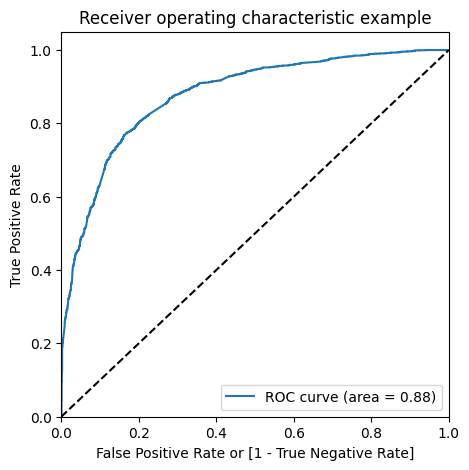

In [89]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [90]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.054824,0,1,0,0,0,0,0,0,0,0,0
1,0,0.511330,1,1,1,1,1,1,1,0,0,0,0
2,1,0.942417,1,1,1,1,1,1,1,1,1,1,1
3,0,0.426007,0,1,1,1,1,1,0,0,0,0,0
4,0,0.139180,0,1,1,0,0,0,0,0,0,0,0


In [91]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.485083  1.000000  0.000000
0.1   0.1  0.591261  0.985956  0.219434
0.2   0.2  0.718346  0.945278  0.504562
0.3   0.3  0.775194  0.900726  0.656934
0.4   0.4  0.799154  0.815496  0.783759
0.5   0.5  0.801268  0.756416  0.843522
0.6   0.6  0.792577  0.700726  0.879106
0.7   0.7  0.754522  0.583535  0.915602
0.8   0.8  0.723984  0.483777  0.950274
0.9   0.9  0.660794  0.319613  0.982208


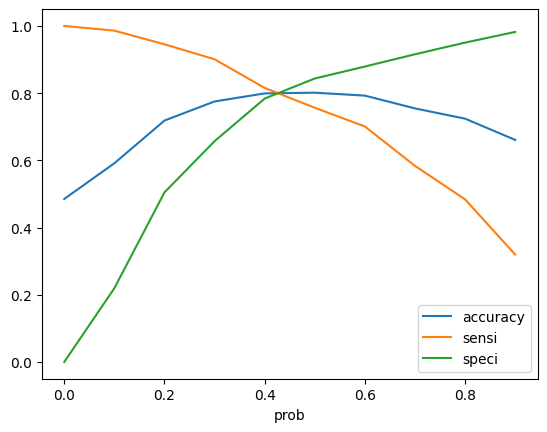

In [92]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.43, you get the optimal values of the three metrics. So let's choose 0.43 as our cutoff now.

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.054824,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.511330,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.942417,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.426007,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.139180,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8007986845196148

In [113]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1761,  431],
       [ 417, 1648]], dtype=int64)

In [114]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Calculate Sensitivity

TP/(TP+FN)

0.7980629539951574

In [116]:
# Calculate Specificity

TN/(TN+FP)

0.8033759124087592

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [117]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [118]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Hospitality Management,How did you hear about X Education_Email,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
9081,0.036364,0.143046,0.036364,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
7526,0.072727,0.292694,0.072727,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6783,0.163636,0.850352,0.163636,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5965,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6074,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [119]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [120]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,...,Last Activity_Unreachable,Specialization_Hospitality Management,How did you hear about X Education_Email,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
9081,1.0,0.036364,0.143046,0.036364,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7526,1.0,0.072727,0.292694,0.072727,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6783,1.0,0.163636,0.850352,0.163636,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5965,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6074,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,1.0,0.036364,0.055898,0.036364,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2654,1.0,0.036364,0.657570,0.018182,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1825,1.0,0.090909,0.012764,0.090909,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4558,1.0,0.054545,0.015405,0.054545,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [122]:
# Drop the required columns from X_test as well

X_test.drop(['Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife','What is your current occupation_Student','What is your current occupation_Unemployed','How did you hear about X Education_Email'], axis = 1, inplace = True)

In [123]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [124]:
y_test_pred[:10]

9081    0.029124
7526    0.601813
6783    0.641427
5965    0.386186
6074    0.386186
2930    0.242992
5466    0.763648
5859    0.158625
4667    0.386186
4877    0.805975
dtype: float64

In [125]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head

y_pred_1.head()

,0
9081,0.029124
7526,0.601813
6783,0.641427
5965,0.386186
6074,0.386186


In [127]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [128]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.029124
1,1,0.601813
2,0,0.641427
3,1,0.386186
4,1,0.386186


In [131]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [132]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.029124
1,1,0.601813
2,0,0.641427
3,1,0.386186
4,1,0.386186


In [134]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [135]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.029124,0
1,1,0.601813,1
2,0,0.641427,1
3,1,0.386186,0
4,1,0.386186,0


In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7780200610553859

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[895, 272],
       [237, 889]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculate sensitivity
TP / float(TP+FN)

0.7895204262877442

In [140]:
# Calculate specificity
TN / float(TN+FP)

0.766923736075407

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [141]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1849,  343],
       [ 503, 1562]], dtype=int64)

##### Precision
TP / TP + FP

In [142]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8199475065616798

##### Recall
TP / TP + FN

In [143]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7564164648910412

### Precision and recall tradeoff

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 4252    0
 4253    1
 4254    1
 4255    1
 4256    1
 Name: Converted, Length: 4257, dtype: int32,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 4252    0
 4253    1
 4254    1
 4255    1
 4256    1
 Name: Predicted, Length: 4257, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

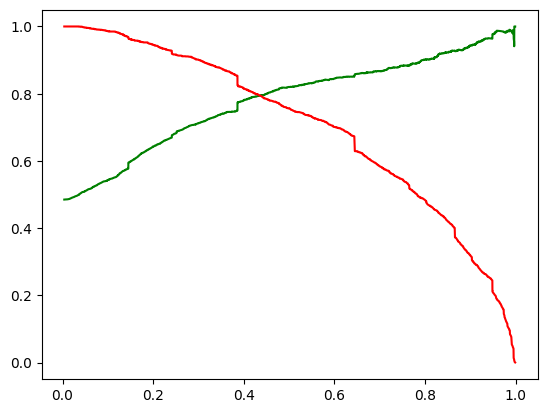

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.054824,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.511330,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.942417,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.426007,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.139180,0,1,1,0,0,0,0,0,0,0,0,0


In [149]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8007986845196148

In [150]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1761,  431],
       [ 417, 1648]], dtype=int64)

In [151]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Calculate Precision

TP/(TP+FP)

0.7926887926887927

In [153]:
# Calculate Recall

TP/(TP+FN)

0.7980629539951574

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [154]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [155]:
y_test_pred[:10]

9081    0.029124
7526    0.601813
6783    0.641427
5965    0.386186
6074    0.386186
2930    0.242992
5466    0.763648
5859    0.158625
4667    0.386186
4877    0.805975
dtype: float64

In [156]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head

y_pred_1.head()

,0
9081,0.029124
7526,0.601813
6783,0.641427
5965,0.386186
6074,0.386186


In [158]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [159]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.029124
1,1,0.601813
2,0,0.641427
3,1,0.386186
4,1,0.386186


In [162]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [164]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.029124,0
1,1,0.601813,1
2,0,0.641427,1
3,1,0.386186,0
4,1,0.386186,0


In [165]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [166]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.029124,0
1,1,0.601813,1
2,0,0.641427,1
3,1,0.386186,0
4,1,0.386186,0


In [167]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7780200610553859

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[895, 272],
       [237, 889]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Calculate Precision

TP/(TP+FP)

0.7657192075796727

In [171]:
# Calculate Recall

TP/(TP+FN)

0.7895204262877442

## Summary

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.
First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.
Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses. 
